### Importando as bibliotecas

In [1]:
import pandas as pd
from pandas import Series 
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Estacionariedade da série temporal
from statsmodels.tsa.stattools import adfuller

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Dados//AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


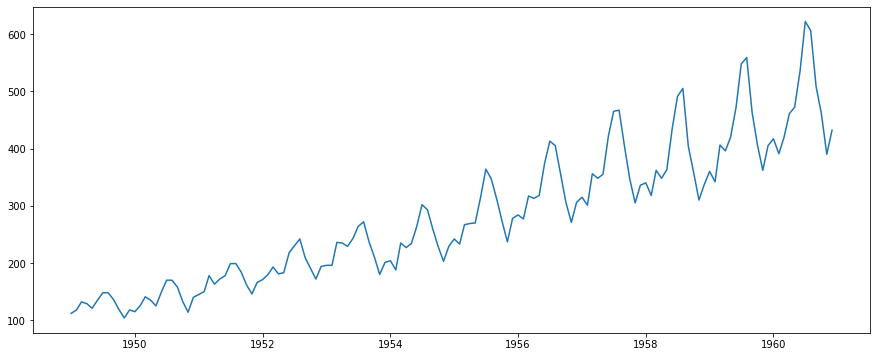

In [4]:
plt.plot(data)

### Usando diferenciação para tornar a série temporal estacionária

In [5]:
y = data['#Passengers']

In [7]:
def adf_test(y):
    print('Resultado do teste Dickey-Fuller:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor P', 'Número de Lags', 'Número de observações'])
    for k, v in dftest[4].items():
        dfoutput['Valor crítico: ({})'.format(k)] = v
    print(dfoutput)

In [8]:
adf_test(y)

Resultado do teste Dickey-Fuller:
Teste                      0.815369
Valor P                    0.991880
Número de Lags            13.000000
Número de observações    130.000000
Valor crítico: (1%)       -3.481682
Valor crítico: (5%)       -2.884042
Valor crítico: (10%)      -2.578770
dtype: float64


#### Aplicando a diferenciação

In [9]:
y_diff = np.diff(y)

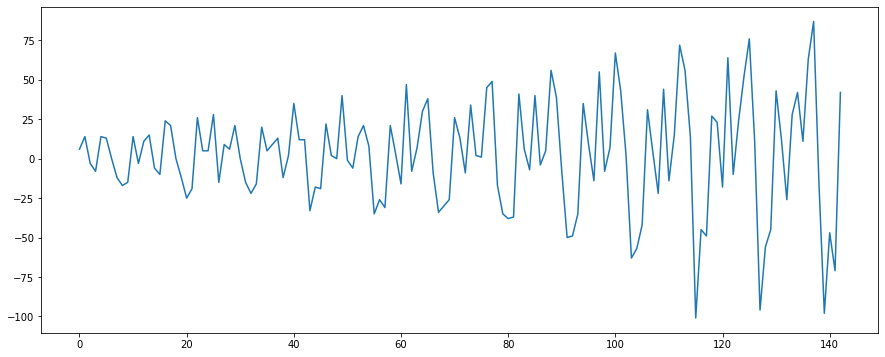

In [10]:
plt.plot(y_diff)

##### Usando o teste estatístico para observar se a série se encontra estacionária aplicando a diferenciação 

In [11]:
adf_test(y_diff)

Resultado do teste Dickey-Fuller:
Teste                     -2.829267
Valor P                    0.054213
Número de Lags            12.000000
Número de observações    130.000000
Valor crítico: (1%)       -3.481682
Valor crítico: (5%)       -2.884042
Valor crítico: (10%)      -2.578770
dtype: float64


O valor de P ainda não é o esperado.
##### Vamos aplicar a diferenciação de segunda ordem

In [13]:
y_diff2 = np.diff(y_diff)

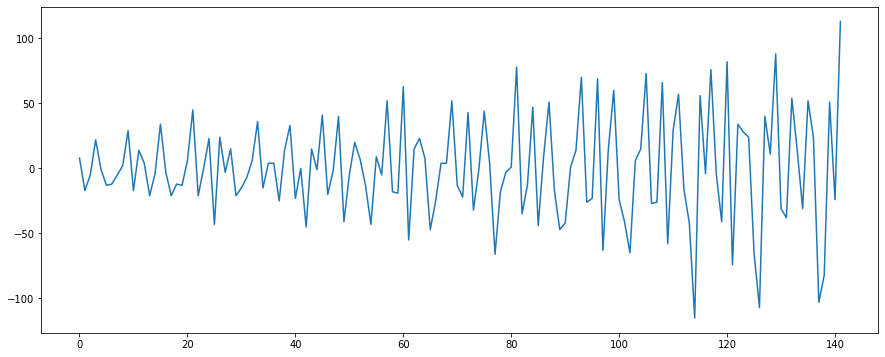

In [15]:
plt.plot(y_diff2)

In [16]:
adf_test(y_diff2)

Resultado do teste Dickey-Fuller:
Teste                   -1.638423e+01
Valor P                  2.732892e-29
Número de Lags           1.100000e+01
Número de observações    1.300000e+02
Valor crítico: (1%)     -3.481682e+00
Valor crítico: (5%)     -2.884042e+00
Valor crítico: (10%)    -2.578770e+00
dtype: float64


In [17]:
# Agora a série é uma série temporal estacionária, pois o valor de P se encontra abaixo de 0,05